In [1]:
from dds.configs.config import set_task, get_config
#from dds.train_dds import train_dds

import numpy as onp
from dds.targets.toy_targets import *
from dds.train_dds_anneal import train_dds_anneal

# %%
funnel_config = get_config()


# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05  # 0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "linear"

from dds.targets.toy_targets import get_attr

### SET TASK
task = "mlpw"
div = 1000
c = 10000


# div, e, other_dim = get_attr()
# div = str(div).replace(".", "")
# e = str(e).replace(".", "")
#
# save_name = f"{task}_s{div}_plus{e}_od{other_dim}"

funnel_config = set_task(funnel_config, task, div, c)
funnel_config.model.reference_process_key = "oudstl"

# funnel_config.model.reference_process_key = "pisstl"
# funnel_config.model.step_scheme_key = "uniform"

# exp_dec
# cos_sq
# uniform
# last_small
# linear_dds
# linear
# uniform_dds

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.2#0.6875
    funnel_config.model.m = 1.0

    # Path opt settings
    funnel_config.model.exp_dds = False

funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

# funnel_config.model.stl = True
# funnel_config.model.detach_stl_drift = True

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 1 * 10 ** (-3)
funnel_config.trainer.lr_sch_base_dec = 0.90  # For funnel
# %%
funnel_config.model.reference_process_key
# %%
input_dim = funnel_config.model.input_dim
# %%
funnel_config.model.step_scheme_key
# %%
funnel_config.model.ts.shape
# %%


funnel_config.model.input_dim = 1
funnel_config.trainer.epochs = 51

# divs = [1000, 100, 50, 25, 10]
# epochs = [51, 151, 301, 301, 301]
# lrs = [0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]


In [41]:
epochs = [30, 30, 30, 30, 30, 30, 30, 30, 30, 200]
divs = [1, 0.8, 0.5, 0.2, 0.1, 0.08, 0.05,0.02]
lrs = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001]
epochs = [50, 200]
divs = [0.05, 0.01]
lrs = [0.001, 0.0005]

epochs = [249]
divs = [0.01]
lrs = [0.0005]


eval = False
pretrained = None
iterations = 2
for i in range(iterations):
    if iterations == i + 1:
        eval = True
    funnel_config.trainer.epochs = epochs[i]
    funnel_config.model.target_class.div = divs[i]
    funnel_config.trainer.learning_rate = lrs[i]
    params, model_state, forward_fn_wrap, rng_key, results_dict, [trainable_params, non_trainable_params] = train_dds_anneal(funnel_config, pretrained, eval)
    pretrained = [trainable_params, non_trainable_params]

    print("\n\n")


Best training loss: [-0.50035954]
Mean: [0.5555372 0.        0.        0.       ]
Best: [-0.3595126]
('epoch: %s %s  loss: %s', 0, 'TRAIN', array([-1.560995e+24], dtype=float32))
('epoch: %s %s  loss: %s', 1, 'TRAIN', array([-1.3449867e+24], dtype=float32))
('epoch: %s %s  loss: %s', 2, 'TRAIN', array([-1.7048197e+24], dtype=float32))
('epoch: %s %s  loss: %s', 3, 'TRAIN', array([-1.3771368e+24], dtype=float32))
('epoch: %s %s  loss: %s', 4, 'TRAIN', array([-1.6529647e+24], dtype=float32))
('epoch: %s %s  loss: %s', 5, 'TRAIN', array([-1.5528004e+24], dtype=float32))
('epoch: %s %s  loss: %s', 6, 'TRAIN', array([-1.5042542e+24], dtype=float32))
('epoch: %s %s  loss: %s', 7, 'TRAIN', array([-1.2109777e+24], dtype=float32))
('epoch: %s %s  loss: %s', 8, 'TRAIN', array([-1.424793e+24], dtype=float32))
('epoch: %s %s  loss: %s', 9, 'TRAIN', array([-1.6658759e+24], dtype=float32))
('epoch: %s %s  loss: %s', 10, 'TRAIN', array([-1.2650255e+24], dtype=float32))
('epoch: %s %s  loss: %s', 11, 

IndexError: list index out of range

5000
[ 0.49294463 -1.3764241   1.8940501  ... -0.7772213  -1.2316871
  2.2818778 ]


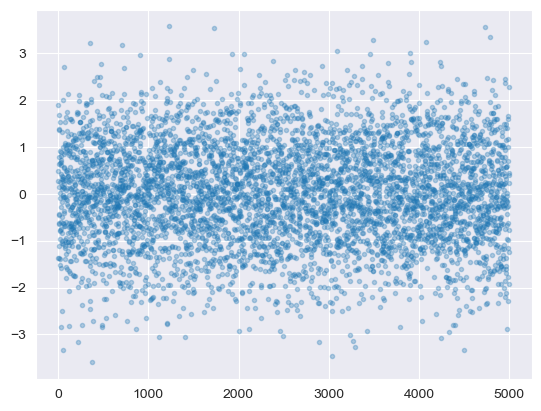

In [42]:
import matplotlib.pyplot as plt
sde_targ = results_dict["aug"]#[-1]
print(len(sde_targ[:, 0]))
print(sde_targ[:,-1,0])
plt.plot(sde_targ[:,-1,0], ".", alpha=0.3)

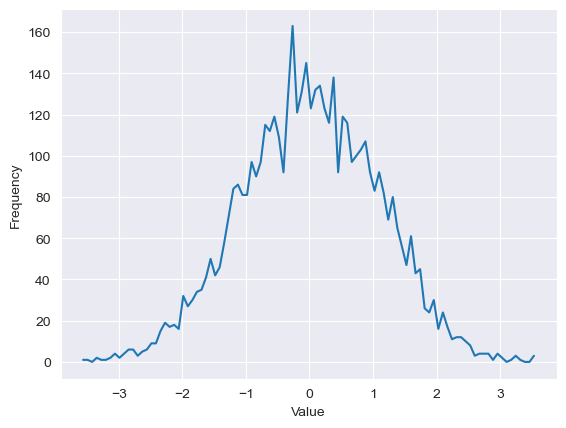

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for sample in sde_targ[:,-1,0]:
    s = sample
    data.append(s)

# Compute the histogram values
hist, bin_edges = np.histogram(data, bins=100)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot using Seaborn
sns.lineplot(x=bin_centers, y=hist)

# Set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

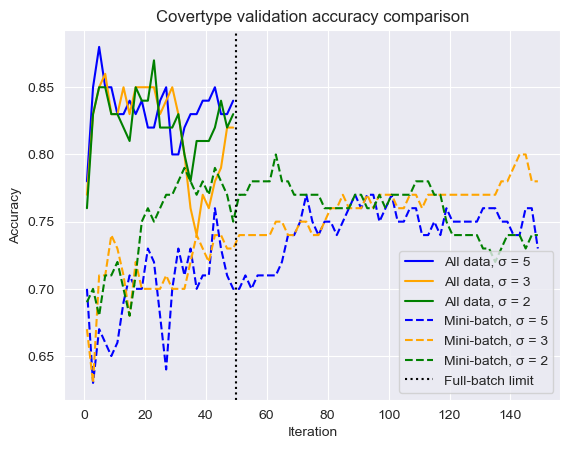

In [15]:
#circles
validation = [[0.7119999527931213, 0.873199999332428, 0.9167999625205994, 0.9447999596595764, 0.8799999952316284, 0.8191999793052673, 0.7971999645233154, 0.7683999538421631, 0.7195999622344971, 0.745199978351593, 0.7572000026702881, 0.7411999702453613, 0.745199978351593, 0.7439999580383301, 0.715999960899353, 0.7175999879837036, 0.7191999554634094, 0.7199999690055847, 0.7195999622344971, 0.7203999757766724, 0.7191999554634094, 0.717199981212616, 0.7188000082969666, 0.7195999622344971, 0.7199999690055847, 0.7195999622344971, 0.7391999959945679, 0.7195999622344971, 0.7199999690055847, 0.7203999757766724, 0.7199999690055847, 0.7195999622344971, 0.7199999690055847, 0.72079998254776, 0.7203999757766724, 0.7199999690055847, 0.7184000015258789, 0.7188000082969666, 0.7195999622344971, 0.7203999757766724, 0.7184000015258789, 0.7195999622344971, 0.7203999757766724, 0.7191999554634094, 0.7195999622344971, 0.7235999703407288, 0.7251999974250793, 0.7235999703407288, 0.7263999581336975, 0.7279999852180481, 0.7287999987602234, 0.729200005531311, 0.7295999526977539, 0.7319999933242798, 0.7319999933242798, 0.7339999675750732, 0.7295999526977539, 0.7379999756813049, 0.7307999730110168, 0.7303999662399292], [0.7091999650001526, 0.8763999938964844, 0.9423999786376953, 0.9003999829292297, 0.8455999493598938, 0.8455999493598938, 0.7975999712944031, 0.7227999567985535, 0.7031999826431274, 0.6791999936103821, 0.6735999584197998, 0.6735999584197998, 0.6627999544143677, 0.6204000115394592, 0.6179999709129333, 0.6175999641418457, 0.6164000034332275, 0.6159999966621399, 0.6168000102043152, 0.6171999573707581, 0.6171999573707581, 0.6179999709129333, 0.6179999709129333, 0.618399977684021, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.618399977684021, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.618399977684021, 0.618399977684021, 0.6179999709129333, 0.618399977684021, 0.6179999709129333, 0.6179999709129333, 0.618399977684021, 0.618399977684021, 0.6175999641418457, 0.6175999641418457, 0.618399977684021, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.6179999709129333, 0.6187999844551086, 0.618399977684021, 0.618399977684021, 0.618399977684021, 0.618399977684021, 0.618399977684021, 0.618399977684021, 0.6179999709129333, 0.618399977684021, 0.618399977684021, 0.6179999709129333, 0.618399977684021], [0.7267999649047852, 0.9335999488830566, 0.9099999666213989, 0.8303999900817871, 0.8416000008583069, 0.8019999861717224, 0.8463999629020691, 0.7955999970436096, 0.8064000010490417, 0.7871999740600586, 0.7543999552726746, 0.7815999984741211, 0.7928000092506409, 0.8019999861717224, 0.795199990272522, 0.7863999605178833, 0.7811999917030334, 0.7839999794960022, 0.7883999943733215, 0.7883999943733215, 0.7871999740600586, 0.7899999618530273, 0.7895999550819397, 0.7888000011444092, 0.7888000011444092, 0.790399968624115, 0.7879999876022339, 0.7935999631881714, 0.7935999631881714, 0.7924000024795532, 0.793999969959259, 0.7935999631881714, 0.7895999550819397, 0.7919999957084656, 0.7919999957084656, 0.7931999564170837, 0.7931999564170837, 0.7928000092506409, 0.793999969959259, 0.7943999767303467, 0.7931999564170837, 0.793999969959259, 0.7931999564170837, 0.7971999645233154, 0.793999969959259, 0.7955999970436096, 0.7943999767303467, 0.7928000092506409, 0.7947999835014343, 0.795199990272522, 0.793999969959259, 0.7919999957084656, 0.7931999564170837, 0.7924000024795532, 0.7947999835014343, 0.7955999970436096, 0.793999969959259, 0.7919999957084656, 0.7960000038146973, 0.7943999767303467]]
train = [[0.7211999893188477, 0.873199999332428, 0.91839998960495, 0.9429999589920044, 0.8763999938964844, 0.811199963092804, 0.7863999605178833, 0.7583999633789062, 0.7095999717712402, 0.7360000014305115, 0.7486000061035156, 0.7293999791145325, 0.7365999817848206, 0.7364000082015991, 0.7113999724388123, 0.7111999988555908, 0.7116000056266785, 0.7113999724388123, 0.7117999792098999, 0.7137999534606934, 0.712399959564209, 0.7129999995231628, 0.712399959564209, 0.7117999792098999, 0.7129999995231628, 0.7121999859809875, 0.7310000061988831, 0.7137999534606934, 0.7131999731063843, 0.712399959564209, 0.7131999731063843, 0.7125999927520752, 0.712399959564209, 0.7121999859809875, 0.7119999527931213, 0.7127999663352966, 0.7125999927520752, 0.7125999927520752, 0.7116000056266785, 0.7117999792098999, 0.7116000056266785, 0.7129999995231628, 0.7134000062942505, 0.7119999527931213, 0.7129999995231628, 0.7139999866485596, 0.7157999873161316, 0.7148000001907349, 0.714199960231781, 0.7206000089645386, 0.7179999947547913, 0.7152000069618225, 0.72079998254776, 0.7227999567985535, 0.7213999629020691, 0.7227999567985535, 0.7199999690055847, 0.7339999675750732, 0.7217999696731567, 0.7206000089645386], [0.7193999886512756, 0.8859999775886536, 0.9353999495506287, 0.9013999700546265, 0.8351999521255493, 0.8485999703407288, 0.79339998960495, 0.7111999988555908, 0.6908000111579895, 0.6631999611854553, 0.6647999882698059, 0.6629999876022339, 0.6455999612808228, 0.6031999588012695, 0.6019999980926514, 0.6015999913215637, 0.6011999845504761, 0.6011999845504761, 0.6013999581336975, 0.6011999845504761, 0.6013999581336975, 0.6011999845504761, 0.6015999913215637, 0.6015999913215637, 0.6011999845504761, 0.6017999649047852, 0.6015999913215637, 0.6013999581336975, 0.6013999581336975, 0.6011999845504761, 0.6013999581336975, 0.6015999913215637, 0.6013999581336975, 0.6013999581336975, 0.6011999845504761, 0.6015999913215637, 0.6015999913215637, 0.6013999581336975, 0.6013999581336975, 0.6013999581336975, 0.6015999913215637, 0.6011999845504761, 0.6015999913215637, 0.6015999913215637, 0.6015999913215637, 0.6017999649047852, 0.6015999913215637, 0.6013999581336975, 0.6011999845504761, 0.6013999581336975, 0.6017999649047852, 0.602400004863739, 0.6031999588012695, 0.6025999784469604, 0.6025999784469604, 0.6025999784469604, 0.6013999581336975, 0.6013999581336975, 0.6033999919891357, 0.6013999581336975], [0.7217999696731567, 0.9404000043869019, 0.8983999490737915, 0.8154000043869019, 0.8247999548912048, 0.7971999645233154, 0.8337999582290649, 0.7897999882698059, 0.8046000003814697, 0.7833999991416931, 0.7459999918937683, 0.7741999626159668, 0.7899999618530273, 0.7979999780654907, 0.7913999557495117, 0.7871999740600586, 0.7799999713897705, 0.7831999659538269, 0.7849999666213989, 0.7861999869346619, 0.7861999869346619, 0.7851999998092651, 0.7865999937057495, 0.7859999537467957, 0.7856000065803528, 0.7851999998092651, 0.7859999537467957, 0.7889999747276306, 0.7892000079154968, 0.7879999876022339, 0.7893999814987183, 0.788599967956543, 0.7859999537467957, 0.7883999943733215, 0.7883999943733215, 0.7892000079154968, 0.7897999882698059, 0.7888000011444092, 0.790399968624115, 0.7910000085830688, 0.7901999950408936, 0.7907999753952026, 0.7897999882698059, 0.7942000031471252, 0.7895999550819397, 0.790399968624115, 0.7893999814987183, 0.7883999943733215, 0.790399968624115, 0.7911999821662903, 0.7895999550819397, 0.7889999747276306, 0.7888000011444092, 0.7875999808311462, 0.7897999882698059, 0.7913999557495117, 0.7888000011444092, 0.7875999808311462, 0.790399968624115, 0.7875999808311462]]

#bc
val1 = [[0.9436619281768799, 0.9577464461326599, 0.9507042169570923, 0.9577464461326599, 0.9577464461326599, 0.9718309640884399, 0.9647887349128723, 0.9647887349128723, 0.9577464461326599, 0.9577464461326599, 0.9366196990013123, 0.9366196990013123, 0.9436619281768799, 0.9718309640884399, 0.9718309640884399, 0.9718309640884399, 0.9718309640884399, 0.9718309640884399, 0.9718309640884399, 0.9647887349128723, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9436619281768799, 0.9507042169570923, 0.9507042169570923, 0.9436619281768799, 0.9436619281768799, 0.9436619281768799, 0.9436619281768799, 0.9507042169570923, 0.9436619281768799, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9507042169570923, 0.9436619281768799, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9577464461326599, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923], [0.9507042169570923, 0.9647887349128723, 0.9647887349128723, 0.9647887349128723, 0.9577464461326599, 0.9577464461326599, 0.9647887349128723, 0.9647887349128723, 0.9647887349128723, 0.9647887349128723, 0.9718309640884399, 0.9647887349128723, 0.9295774698257446, 0.9366196990013123, 0.9507042169570923, 0.9507042169570923, 0.9577464461326599, 0.9647887349128723, 0.9647887349128723, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9507042169570923, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9577464461326599, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923, 0.9507042169570923], [0.9507042169570923, 0.9577464461326599, 0.9647887349128723, 0.9647887349128723, 0.9577464461326599, 0.9295774698257446, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9084506630897522, 0.9084506630897522, 0.9084506630897522, 0.9154929518699646, 0.9295774698257446, 0.9507042169570923, 0.9154929518699646, 0.9577464461326599, 0.9577464461326599, 0.9577464461326599, 0.9507042169570923, 0.9507042169570923, 0.9366196990013123, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322]]
train1 = [[0.9225351810455322, 0.9401408433914185, 0.933098554611206, 0.9401408433914185, 0.933098554611206, 0.9295774698257446, 0.933098554611206, 0.9366196990013123, 0.933098554611206, 0.9401408433914185, 0.9190140962600708, 0.9190140962600708, 0.9401408433914185, 0.9436619281768799, 0.9436619281768799, 0.9401408433914185, 0.9436619281768799, 0.9436619281768799, 0.9401408433914185, 0.9401408433914185, 0.9366196990013123, 0.9366196990013123, 0.933098554611206, 0.933098554611206, 0.9295774698257446, 0.9260563254356384, 0.9225351810455322, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9295774698257446, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9436619281768799, 0.9436619281768799, 0.9436619281768799, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9401408433914185, 0.9366196990013123], [0.9190140962600708, 0.9401408433914185, 0.9401408433914185, 0.9436619281768799, 0.9260563254356384, 0.9225351810455322, 0.9366196990013123, 0.933098554611206, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9366196990013123, 0.9084506630897522, 0.9190140962600708, 0.9225351810455322, 0.9260563254356384, 0.933098554611206, 0.933098554611206, 0.933098554611206, 0.933098554611206, 0.933098554611206, 0.9260563254356384, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9225351810455322, 0.9190140962600708, 0.9190140962600708, 0.9225351810455322, 0.9225351810455322, 0.9190140962600708, 0.9190140962600708, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9190140962600708, 0.9190140962600708, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9154929518699646, 0.9119718074798584, 0.9119718074798584, 0.9119718074798584], [0.9154929518699646, 0.9366196990013123, 0.933098554611206, 0.9366196990013123, 0.9366196990013123, 0.9014084339141846, 0.8873239159584045, 0.8767605423927307, 0.8661971688270569, 0.8732393980026245, 0.8732393980026245, 0.8802816867828369, 0.8802816867828369, 0.9014084339141846, 0.9260563254356384, 0.9190140962600708, 0.933098554611206, 0.933098554611206, 0.9401408433914185, 0.9366196990013123, 0.9295774698257446, 0.9190140962600708, 0.8908450603485107, 0.8802816867828369, 0.8873239159584045, 0.8908450603485107, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.9014084339141846, 0.9014084339141846, 0.9014084339141846, 0.8978872895240784, 0.8978872895240784, 0.9014084339141846, 0.8978872895240784, 0.8978872895240784, 0.8978872895240784, 0.9014084339141846, 0.9014084339141846, 0.9049295783042908, 0.9049295783042908, 0.9049295783042908, 0.9049295783042908, 0.9084506630897522, 0.9084506630897522, 0.9084506630897522]]

### FULL BATCH

#bc
val2 = [[0.9647887349128723, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422], [0.9647887349128723, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876], [0.9577464461326599, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.9929577112197876, 0.98591548204422, 0.9507042169570923, 0.98591548204422, 0.9929577112197876, 0.9788731932640076, 0.9295774698257446, 0.26056337356567383, 0.2887323796749115, 0.9647887349128723, 0.9577464461326599, 0.9718309640884399, 0.9718309640884399, 0.9788731932640076, 0.9788731932640076, 0.9788731932640076, 0.9788731932640076, 0.9718309640884399, 0.9718309640884399, 0.9788731932640076, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.9788731932640076, 0.9788731932640076, 0.9788731932640076, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9788731932640076, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9929577112197876, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9788731932640076, 0.98591548204422, 0.9788731932640076, 0.9788731932640076, 0.9788731932640076, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.98591548204422, 0.9788731932640076, 0.98591548204422]]

#circles
val3 = [[0.7787999510765076, 0.9799999594688416, 0.9991999864578247, 0.9995999932289124, 0.9983999729156494, 0.995199978351593, 0.9827999472618103, 0.9979999661445618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 0.9995999932289124, 0.9995999932289124, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124], [0.7731999754905701, 0.9843999743461609, 0.9983999729156494, 0.9987999796867371, 0.9987999796867371, 0.9932000041007996, 0.9959999918937683, 0.9947999715805054, 0.9987999796867371, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.7523999810218811, 0.9919999837875366, 0.9983999729156494, 0.9987999796867371, 0.9991999864578247, 0.9983999729156494, 0.9824000000953674, 0.9811999797821045, 0.9891999959945679, 0.9851999878883362, 0.9955999851226807, 0.9979999661445618, 0.9987999796867371, 0.9987999796867371, 0.9987999796867371, 0.9979999661445618, 0.9979999661445618, 0.9943999648094177, 0.9843999743461609, 0.9811999797821045, 0.5460000038146973, 0.9703999757766724, 0.9932000041007996, 0.9995999932289124, 0.9987999796867371, 0.9987999796867371, 0.9987999796867371, 0.9987999796867371, 0.9971999526023865, 0.995199978351593, 0.9987999796867371, 0.9979999661445618, 0.9927999973297119, 0.9983999729156494, 0.6667999625205994, 0.6715999841690063, 0.9967999458312988, 0.9979999661445618, 0.9959999918937683, 0.9983999729156494, 0.9995999932289124, 0.9991999864578247, 0.9991999864578247, 0.9987999796867371, 0.9991999864578247, 0.9987999796867371, 0.9995999932289124, 0.9995999932289124, 0.9991999864578247, 0.9995999932289124, 1.0, 0.9995999932289124, 0.9987999796867371, 0.9991999864578247, 0.9983999729156494, 0.9987999796867371, 0.9983999729156494, 0.9991999864578247, 0.9987999796867371, 1.0]]

# Forest
val4 = [[0.7799999713897705, 0.8499999642372131, 0.8799999952316284, 0.8499999642372131, 0.8499999642372131, 0.8299999833106995, 0.8299999833106995, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8199999928474426, 0.8199999928474426, 0.8399999737739563, 0.8499999642372131, 0.7999999523162842, 0.7999999523162842, 0.8199999928474426, 0.8299999833106995, 0.8299999833106995, 0.8399999737739563, 0.8399999737739563, 0.8499999642372131, 0.8299999833106995, 0.8299999833106995, 0.8399999737739563], [0.7699999809265137, 0.8299999833106995, 0.8499999642372131, 0.85999995470047, 0.8299999833106995, 0.8299999833106995, 0.8499999642372131, 0.8299999833106995, 0.8499999642372131, 0.8499999642372131, 0.8499999642372131, 0.8499999642372131, 0.8299999833106995, 0.8399999737739563, 0.8499999642372131, 0.8299999833106995, 0.7999999523162842, 0.7599999904632568, 0.7400000095367432, 0.7699999809265137, 0.7599999904632568, 0.7799999713897705, 0.7899999618530273, 0.8199999928474426, 0.8199999928474426], [0.7599999904632568, 0.8299999833106995, 0.8499999642372131, 0.8499999642372131, 0.8299999833106995, 0.8299999833106995, 0.8199999928474426, 0.8100000023841858, 0.8499999642372131, 0.8399999737739563, 0.8399999737739563, 0.8700000047683716, 0.8199999928474426, 0.8199999928474426, 0.8199999928474426, 0.8299999833106995, 0.7999999523162842, 0.7799999713897705, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8199999928474426, 0.8399999737739563, 0.8199999928474426, 0.8299999833106995]]

# forest mini
val5 = [[0.699999988079071, 0.6299999952316284, 0.6699999570846558, 0.6599999666213989, 0.6499999761581421, 0.6599999666213989, 0.6899999976158142, 0.7099999785423279, 0.699999988079071, 0.699999988079071, 0.7299999594688416, 0.7199999690055847, 0.6800000071525574, 0.6399999856948853, 0.699999988079071, 0.7299999594688416, 0.7099999785423279, 0.7299999594688416, 0.699999988079071, 0.7099999785423279, 0.7099999785423279, 0.7599999904632568, 0.7299999594688416, 0.7099999785423279, 0.699999988079071, 0.699999988079071, 0.7099999785423279, 0.699999988079071, 0.7099999785423279, 0.7099999785423279, 0.7099999785423279, 0.7099999785423279, 0.7199999690055847, 0.7400000095367432, 0.7400000095367432, 0.75, 0.7699999809265137, 0.75, 0.7400000095367432, 0.75, 0.75, 0.7400000095367432, 0.75, 0.7599999904632568, 0.7699999809265137, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.75, 0.7599999904632568, 0.7699999809265137, 0.75, 0.75, 0.7599999904632568, 0.7599999904632568, 0.7400000095367432, 0.7400000095367432, 0.75, 0.7400000095367432, 0.7599999904632568, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.75, 0.75, 0.7400000095367432, 0.7400000095367432, 0.7599999904632568, 0.7599999904632568, 0.7299999594688416], [0.6699999570846558, 0.6299999952316284, 0.7099999785423279, 0.7099999785423279, 0.7400000095367432, 0.7299999594688416, 0.7099999785423279, 0.6800000071525574, 0.7199999690055847, 0.699999988079071, 0.699999988079071, 0.699999988079071, 0.699999988079071, 0.7099999785423279, 0.699999988079071, 0.699999988079071, 0.699999988079071, 0.7199999690055847, 0.7400000095367432, 0.7299999594688416, 0.7199999690055847, 0.7400000095367432, 0.7400000095367432, 0.7299999594688416, 0.7299999594688416, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.75, 0.75, 0.7400000095367432, 0.7400000095367432, 0.75, 0.75, 0.7400000095367432, 0.7400000095367432, 0.75, 0.7599999904632568, 0.7599999904632568, 0.7699999809265137, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7699999809265137, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7599999904632568, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7799999713897705, 0.7799999713897705, 0.7899999618530273, 0.7999999523162842, 0.7999999523162842, 0.7799999713897705, 0.7799999713897705], [0.6899999976158142, 0.699999988079071, 0.6800000071525574, 0.7099999785423279, 0.7099999785423279, 0.7199999690055847, 0.699999988079071, 0.6800000071525574, 0.7099999785423279, 0.75, 0.7599999904632568, 0.75, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7799999713897705, 0.7899999618530273, 0.7799999713897705, 0.7699999809265137, 0.7799999713897705, 0.7699999809265137, 0.7899999618530273, 0.7799999713897705, 0.7699999809265137, 0.75, 0.7699999809265137, 0.7699999809265137, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7999999523162842, 0.7799999713897705, 0.7799999713897705, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7599999904632568, 0.7599999904632568, 0.7699999809265137, 0.7599999904632568, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7699999809265137, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7699999809265137, 0.7699999809265137, 0.75, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7299999594688416, 0.7299999594688416, 0.7199999690055847, 0.7299999594688416, 0.7400000095367432, 0.7400000095367432, 0.7400000095367432, 0.7299999594688416, 0.7400000095367432, 0.7400000095367432]]

import matplotlib.pyplot as plt

# Combine the lists
labels1 = ["All data, σ = 5", "All data, σ = 3", "All data, σ = 2"]
labels2 = ["Mini-batch, σ = 5", "Mini-batch, σ = 3", "Mini-batch, σ = 2"]#, "10", "15", "20"]
colors = ["blue", "orange", "green"]#, "red", "purple", "yellow"]

# Plot the data
xax = range(1,151,2)
xax2 = range(1,51,2)
for i, (acc, label, color) in enumerate(zip(val4, labels1, colors)):
    plt.plot(xax2,acc, label=label, color=color)

for i, (acc, label, color) in enumerate(zip(val5, labels2, colors)):
    plt.plot(xax,acc, label=label, color=color, linestyle='dashed')

# Add a horizontal line at y = -1
plt.axvline(x=50, color="black", linestyle="dotted", label="Full-batch limit")

# Add labels and legend
#plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Covertype validation accuracy comparison")
plt.legend(loc="lower right")
plt.show()


In [14]:
SNOOP = [1, 3, 7, 37, 75]
for idx in SNOOP:
    for i in (val5):
        k = i
        k = sorted(k, reverse=True)
        print(sum(k[:idx])/idx)

0.7699999809265137
0.7999999523162842
0.7999999523162842
0.7699999809265137
0.7966666221618652
0.7933332920074463
0.7671428407941546
0.7871428217206683
0.7857142516544887
0.7548648602253681
0.7697297109139932
0.7754053811769228
0.7293333220481872
0.745199986298879
0.7550666507085164


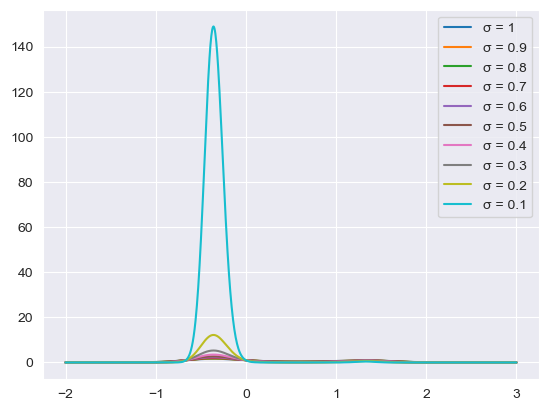

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Local minima created by sine function
    local_minima = np.sin(x*6)

    # Global sharp minimum created by Gaussian function
    a = 0.1
    b = 0.5  # the position of the global minimum
    c = 0.3  # this controls the "sharpness" of the minimum
    global_minimum = -a * np.exp(-0.5 * ((x - b) / c) ** 2)
    return -(-np.sin(3 * x) - x ** 2 + 0.7 * x)
    return local_minima + global_minimum

x = np.linspace(-2, 3, 1000)
#y = f(x)
y = np.exp(-f(x)/1)
y1 = np.exp(-f(x)/0.9)
y2 = np.exp(-f(x)/0.8)
y3 = np.exp(-f(x)/0.7)
y4 = np.exp(-f(x)/0.6)
y5 = np.exp(-f(x)/0.5)
y6 = np.exp(-f(x)/0.4)
y7 = np.exp(-f(x)/0.3)
y8 = np.exp(-f(x)/0.2)
y9 = np.exp(-f(x)/0.1)


plt.plot(x, y, label="σ = 1")
plt.plot(x, y1, label="σ = 0.9")
plt.plot(x, y2, label="σ = 0.8")
plt.plot(x, y3, label="σ = 0.7")
plt.plot(x, y4, label="σ = 0.6")
plt.plot(x, y5, label="σ = 0.5")
plt.plot(x, y6, label="σ = 0.4")
plt.plot(x, y7, label="σ = 0.3")
plt.plot(x, y8, label="σ = 0.2")
plt.plot(x, y9, label="σ = 0.1")
plt.legend()
plt.show()

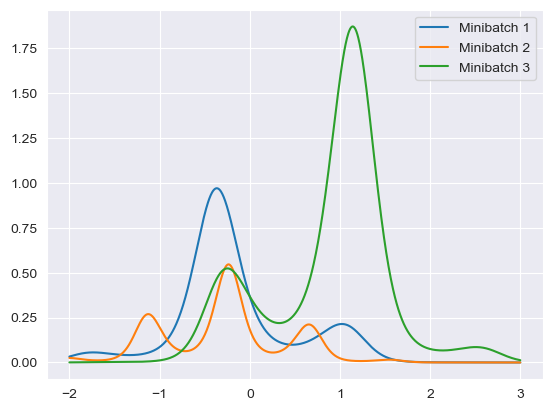

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, k):
    # Local minima created by sine function
    local_minima = np.sin(x*6)

    # Global sharp minimum created by Gaussian function
    a = 0.1
    b = 0.5  # the position of the global minimum
    c = 0.3  # this controls the "sharpness" of the minimum
    global_minimum = -a * np.exp(-0.5 * ((x - b) / c) ** 2)
    return -(-np.sin((3*k+k) * (x*k)) - (x + k) ** 2 + (0.7 + k) * x)
    return local_minima + global_minimum

x = np.linspace(-2, 3, 1000)
#y = f(x)
y = np.exp(-f(x, 1)/1)
y2 = np.exp(-f(x, 1.3)/1)
y3 = np.exp(-f(x, -1)/1)

plt.plot(x, y, label="Minibatch 1")
plt.plot(x, y2, label="Minibatch 2")
plt.plot(x, y3, label="Minibatch 3")
plt.legend()
plt.show()